In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import numpy as np

In [2]:
#jet brains data
jb = pd.read_csv('/Users/michaeltant/Desktop/Research_Project/JetBrains/sharing_data_outside2019.csv')

#stack overflow data
so = pd.read_csv('/Users/michaeltant/Desktop/Research_Project/Stack_Overflow_developer_survey_2020/survey_results_public.csv')

#new coder survey data
nc = pd.read_csv('/Users/michaeltant/Desktop/Research_Project/2018-new-coder-survey-master/clean-data/2018-fCC-New-Coders-Survey-Data.csv')

### Stack Overflow Data

In [3]:
#find the names of each column in stack overflow data
so_col_list = [f'{x[0]}:{x[1]}' for x in enumerate(so.columns)]

# Job Map: Data Analyst, Data Scientist, Data Engineer

The purpose of this job map is make a detailed profile for each job title by supplementing data from the 3 given data sources.

I decided to filter the data market for 3 separate positions: Data Analyst, Data Engineer, and Data Scientist. Where applicable, I show how each position differs, while other times I reference the data market as a whole.

### Job Map: Hard Skills (SO)

These hard skills are based on programming languages respondents listed in there experience.  I summed the keywords from the survey and plotted the totals on a graph.  The graph is broken down by each position in the data market.

In [4]:
#fill missing values with 'none' in order to run .iloc
so['DevType'].fillna('none', inplace=True)
so['MainBranch'].fillna('none', inplace=True)

#filter stack overflow data by keywords related to different professions
so_DataAnalyst = so[so.iloc[:,13].str.contains('Data or business analyst')]
so_DataEngineer = so[so.iloc[:,13].str.contains('Engineer, data', 'Database administrator')]
so_DataScientist = so[so.iloc[:,13].str.contains('Data scientist or machine learning specialist', 'Scientist')]

#create list of professions to reference later
data_careers = {'Data Analyst':so_DataAnalyst, 'Data Engineer':so_DataEngineer, 'Data Scientist':so_DataScientist}

In [5]:
#filtering 'so' for only the data market
so_data_filter = so[so.isin(so_DataAnalyst) | so.isin(so_DataEngineer) | so.isin(so_DataScientist)]

In [6]:
#find hard skills for each position in the data market
DA_skills = so_DataAnalyst.iloc[:,22].str.split(';').apply(pd.Series).stack().reset_index(drop=True).value_counts()
DE_skills = so_DataEngineer.iloc[:,22].str.split(';').apply(pd.Series).stack().reset_index(drop=True).value_counts()
DS_skills = so_DataScientist.iloc[:,22].str.split(';').apply(pd.Series).stack().reset_index(drop=True).value_counts()

In [7]:
#create dataframes for each position
DA_skills_df= pd.DataFrame(list(DA_skills.items()), columns =['Language', 'Amount'])
DE_skills_df= pd.DataFrame(list(DE_skills.items()), columns =['Language', 'Amount'])
DS_skills_df= pd.DataFrame(list(DS_skills.items()), columns =['Language', 'Amount'])

#list the dataframes
skills_data_frames = [DA_skills_df, DE_skills_df, DS_skills_df]

#merge the three dataframes 
skills_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Language'], how='outer'), skills_data_frames)
skills_merged = skills_merged.rename(columns={'Language':'Language', 'Amount_x':'DA', 'Amount_y':'DE', 'Amount':'DS'})

#melt salary_merged in order to access different hues for plotting grouped factor plot
skills_merged = pd.melt(skills_merged, id_vars="Language", var_name="Position", value_name="Amount")

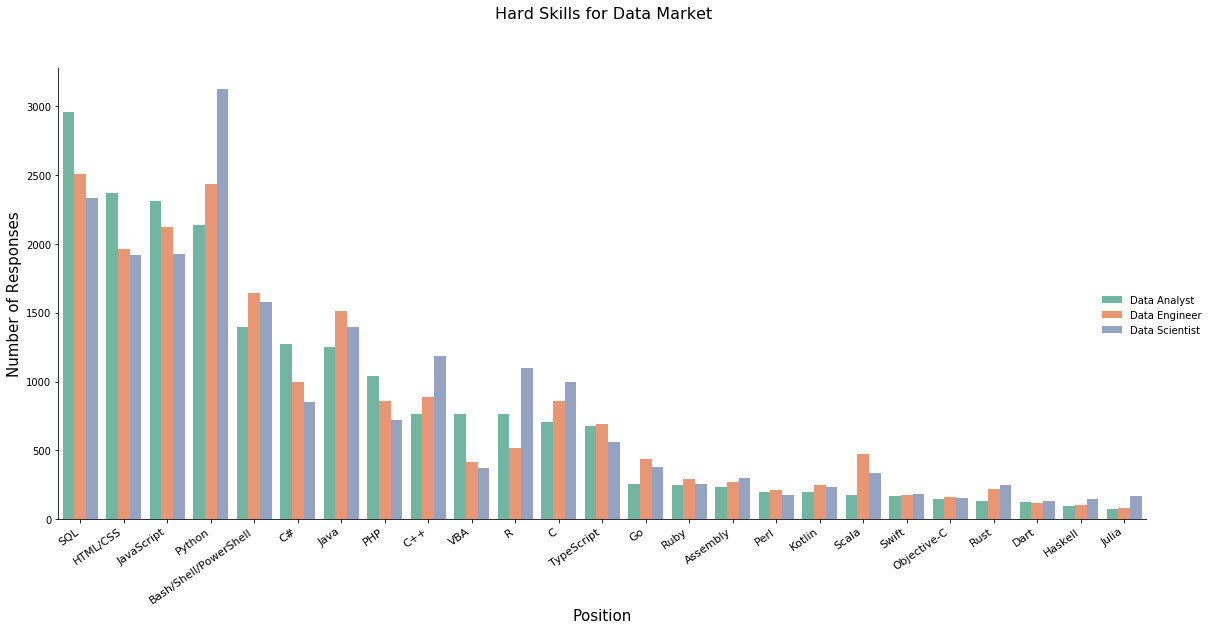

In [8]:
#plot salaries of data market compared between global and US
ax = sns.factorplot(x='Language', y='Amount', hue='Position', data=skills_merged, kind='bar', palette=('Set2'), size=7, aspect=2.3)
ax.fig.suptitle('Hard Skills for Data Market', fontsize='16', position=('0.5', '1.1'))
ax.set_xlabels('Position', fontsize=15)
ax.set_xticklabels(fontsize=11, rotation=35, horizontalalignment='right')
ax.set_ylabels('Number of Responses', fontsize=15)
ax._legend.set_title('')
leg_labels = ['Data Analyst', 'Data Engineer', 'Data Scientist']
for t, l in zip(ax._legend.texts, leg_labels): 
    t.set_text(l)


Conclusion:  

Overall, SQL and Python seem to be the most relevant languages for Data Engineers and Scientists, while SQL and HTML is the most relevant for Data Analysts.  Python is also the most relevant for Data Scientists.  Some front end languages like HTML/CSS and Javascript also rank higher than Python for Analysts.  This could be because Analysts are tasked with not only querying data (SQL), but also with presenting their findings to a wide range of people. 

### Job Map: Salary Info (SO)

For the salaries of the data market, I compared the averages between the United States and the rest of the world.  I used the median salary of each position since there were outliers in the data, which caused the distribution to be askew.  Also, the data of salaries have been converted to US dollars in order to avoid confusion regarding exchange rates and relative value.  

In [9]:
#create list of professions to reference later
data_careers = {'Data Analyst':so_DataAnalyst, 'Data Engineer':so_DataEngineer, 'Data Scientist':so_DataScientist}

#create a dictionary of median global salaries 
salary_global = {}
for career in data_careers:
    info = data_careers[career]
    median = info['ConvertedComp'].median()
    salary_global[career] = median

#create a dictionary of median US salaries
salary_us = {}
for career in data_careers:
    info = data_careers[career]
    info = info[info['Country'] == 'United States']
    median = info['ConvertedComp'].median()
    salary_us[career] = median    

#transform dicts into dataframes  
avg_global_salary = pd.DataFrame(list(salary_global.items()),columns = ['position', 'avg_salary'])
avg_us_salary = pd.DataFrame(list(salary_us.items()),columns = ['position', 'avg_salary'])

#merge the dataframes
salary_merged = avg_global_salary.merge(avg_us_salary, on='position', suffixes=('_global', '_us'))

In [10]:
#melt salary_merged in order to access different hues for plotting grouped factor plot
salary_merged = pd.melt(salary_merged, id_vars="position", var_name="category", value_name="salary")

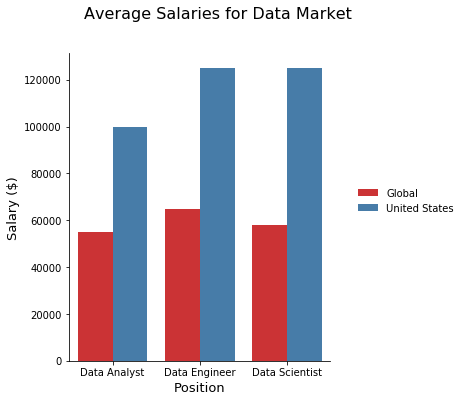

In [11]:
#plot salaries of data market compared between global and US
ax = sns.factorplot(x='position', y='salary', hue='category', data=salary_merged, kind='bar', palette='Set1')
ax.fig.suptitle('Average Salaries for Data Market', fontsize='16', position=('0.5', '1.1'))
ax.set_xlabels('Position', fontsize='13')
ax.set_ylabels('Salary ($)', fontsize='13')
ax._legend.set_title('')
leg_labels = ['Global', 'United States']
for t, l in zip(ax._legend.texts, leg_labels): 
    t.set_text(l)

Conclusion:

Overall, working in the Data Market in the United States is quite rewarding compared to the Global Average.  Data Engineers and Scientist average at the top of their field in the US, while Data Engineers have a slight advantage globally. 

### Job Map: Experience (SO)

I based the experience of the respondents on how many years they have been coding.  I grouped the years in bins of 5, and referenced the data market as a whole.

[Text(0, 0, 'Less than 1 year'),
 Text(0, 0, '1 to 5'),
 Text(0, 0, '5 to 10'),
 Text(0, 0, '10 to 15'),
 Text(0, 0, '15 to 20'),
 Text(0, 0, '20 to 25'),
 Text(0, 0, '25 to 30'),
 Text(0, 0, '30 to 35'),
 Text(0, 0, '35 to 40'),
 Text(0, 0, '40 to 45'),
 Text(0, 0, '45 to 50'),
 Text(0, 0, 'More than 50 years')]

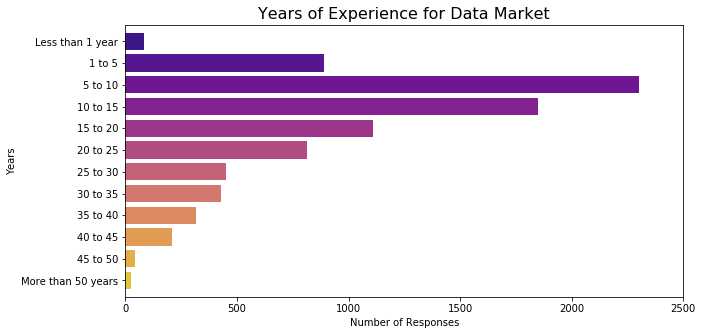

In [12]:
#fill the missing cells with string 'No Data'
so_data_filter['YearsCode']= so_data_filter['YearsCode'].fillna('No Data')

#filter dataframe for string types
years_string = so_data_filter.loc[(so_data_filter['YearsCode'] == 'Less than 1 year') | (so_data_filter['YearsCode'] == 'More than 50 years') | (so_data_filter['YearsCode'] == 'No Data')]

#create dataframe with only integers
years_numeric = so_data_filter[~(so_data_filter.isin(years_string))]
years_numeric['YearsCode'].dropna(inplace=True)
years_numeric['YearsCode'] = years_numeric['YearsCode'].astype(int)

#create new column with age groups
years_numeric['AgeGroups'] = pd.cut(x=years_numeric['YearsCode'], bins=[1,4,9,14,19,24,29,34,39,44,49])

#concatenate string and numeric values
age_groups = pd.concat([years_string['YearsCode'].value_counts(), years_numeric['AgeGroups'].value_counts()]).drop('No Data')

#reorder the dataframe 
correct_order = [0, 5, 2, 3, 4, 6, 7, 8, 9, 10, 11, 1]
age_groups = age_groups.reset_index()
age_groups = age_groups.reindex(index=correct_order)

#plot skills for Data Scientist
plt.figure(figsize=(10,5))
ax = sns.barplot(y=age_groups['index'], x=age_groups[0], orient='h', palette='plasma')
ax.set_title('Years of Experience for Data Market', fontsize=(16))
ax.set(xlabel='Number of Responses', ylabel='Years')
ax.set(xlim=(0,2500),ylim=(11.75,-.75))
ax.set_yticklabels(['Less than 1 year', '1 to 5', '5 to 10', '10 to 15', '15 to 20', '20 to 25', '25 to 30', '30 to 35', '35 to 40', '40 to 45', '45 to 50', 'More than 50 years'])

Conclusion:

A majority of respondents in the data market have between 5 and 10 years experience.  This could be because the field of data has expanded rapidly in recent years, not to mention the field itself is constantly transforming with new job titles being created.  The increase in job demand creates a large void that is filled with new hires.

### Job Map: Self-development and Learning (SO)

For Self-development and learning, I referenced the frequency of learning new languages in the data market as whole.

[(3.75, -0.75), (0, 3500)]

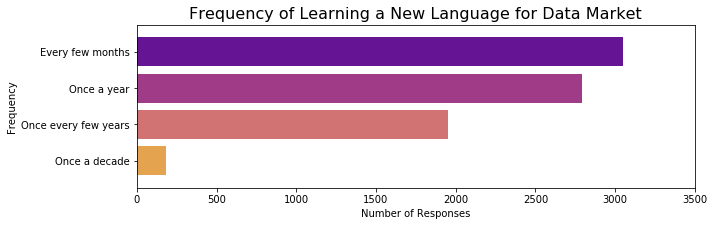

In [13]:
#find data on learning frequencies
learning_freq = so_data_filter['NEWLearn'].value_counts()

#plot skills for Data Scientist
plt.figure(figsize=(10,3))
ax = sns.barplot(y=learning_freq.index, x=learning_freq.values, orient='h', palette='plasma')
ax.set_title('Frequency of Learning a New Language for Data Market', fontsize=(16))
ax.set(xlabel='Number of Responses', ylabel='Frequency')
ax.set(xlim=(0,3500),ylim=(3.75,-.75))

Conclusion:

Over one third of respondents in the data market are learning new languages multiple times a year.  Tech is always rapidly changing and requires a workforce that can be lifelong learners.

### Job Map: Educational Background (SO)

For Educational Background, I plotted a graph of the total amount of majors of each position of the data market.

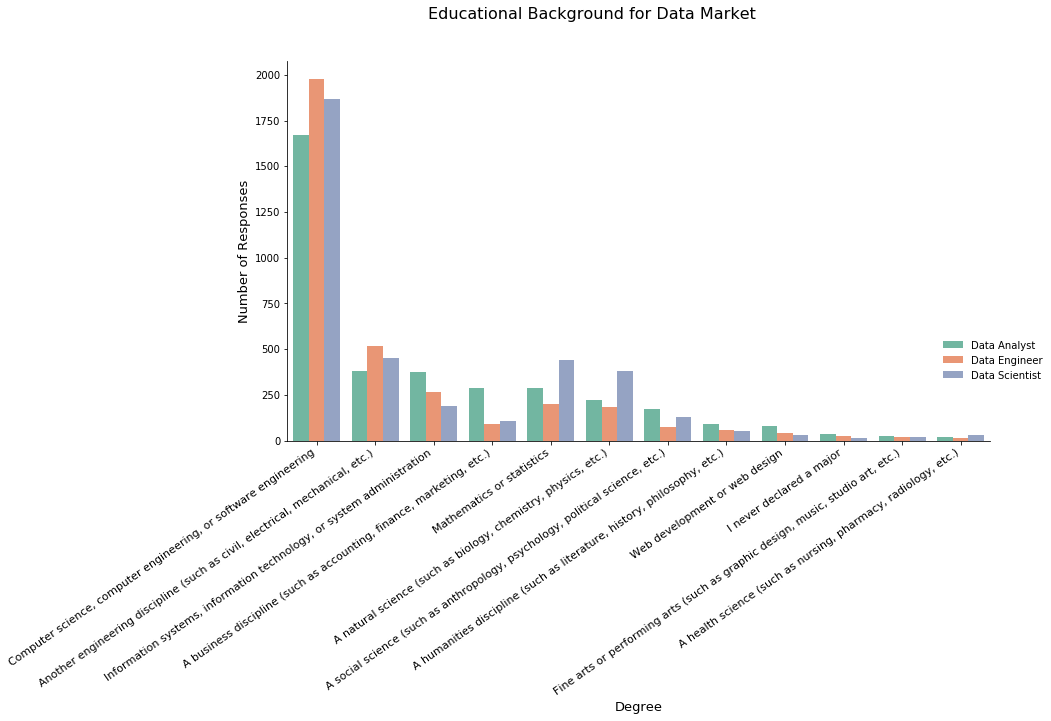

In [14]:
#find majors for each position
DA_ed_bckgrnd = so_DataAnalyst['UndergradMajor'].value_counts()
DE_ed_bckgrnd = so_DataEngineer['UndergradMajor'].value_counts()
DS_ed_bckgrnd = so_DataScientist['UndergradMajor'].value_counts()

#create dataframes
DA_ed_bckgrnd_df = pd.DataFrame(list(DA_ed_bckgrnd.items()), DA_ed_bckgrnd.values, columns = ['Degree', 'Amount'])
DE_ed_bckgrnd_df = pd.DataFrame(list(DE_ed_bckgrnd.items()), DE_ed_bckgrnd.values, columns = ['Degree', 'Amount'])
DS_ed_bckgrnd_df = pd.DataFrame(list(DS_ed_bckgrnd.items()), DS_ed_bckgrnd.values, columns = ['Degree', 'Amount'])

#create list of dataframes
ed_bckgrnd_data_frames = [DA_ed_bckgrnd_df,DE_ed_bckgrnd_df,DS_ed_bckgrnd_df]

#merge the dataframes
ed_bckgrnd_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Degree'], how='outer'), ed_bckgrnd_data_frames)
ed_bckgrnd_merged = ed_bckgrnd_merged.rename(columns={'Language':'Language', 'Amount_x':'DA', 'Amount_y':'DE', 'Amount':'DS'})

#melt salary_merged in order to access different hues for plotting grouped factor plot
ed_bckgrnd_merged = pd.melt(ed_bckgrnd_merged, id_vars="Degree", var_name="Position", value_name="Amount")

#plot educational background for data market 
ax = sns.factorplot(x='Degree', y='Amount', hue='Position', data=ed_bckgrnd_merged, kind='bar', palette=('Set2'), size=6, aspect=2)
ax.fig.suptitle('Educational Background for Data Market', fontsize='16', position=('0.5', '1.1'))
ax.set_xlabels('Degree', fontsize=13)
ax.set_xticklabels(fontsize=11, rotation=35, horizontalalignment='right')
ax.set_ylabels('Number of Responses', fontsize=13)
ax._legend.set_title('')
leg_labels = ['Data Analyst', 'Data Engineer', 'Data Scientist']
for t, l in zip(ax._legend.texts, leg_labels): 
    t.set_text(l)

Conclusion:

It's no surprise that computer science, computer engineering, and software engineering dominate the respondent's choice of undergrad major in college.  We also see data analysts having more business-like backgrounds, while data scientists are involved in math and science.  Data engineers also tend to come from other engineering disciplines.

### Job Map Conclusions and Recommendations:

For hard skills, focus on SQL, Python, Javascript, and HTML/CSS.  If possible, look for a job in the United States, as average salaries for the data market are higher than the rest of the world.  A majority of people in the data market have degrees in computer science/ engineering, so it helps to have a degree in a related field.  Focus on learning new languages and applying the knowledge to actual projects.  This combination of constant learning and applied experience will only help with standing out to potential employers.    

# Employer Profile

The Employer Profile will help create a picture of typical working conditions for the tech industry.  It will give you an idea of what kind of work companies are involved in, how many hours the average employee works, and at what size and scale the company and it's projects operate.

For the Employer Profile, I referenced the Jet Brains Data for most of the questions.  The first couple of cells are preprocessing in order to read the dataset.  This information does not reference the Data Market for most of the information, but instead represents tech as a whole. 

In [15]:
#create a function to separate questions and answer options for jet brains data
def first_element(x):
    col = x.split('.')[0]
    return col

#create a series with just questions
jb_questions = pd.Series(jb.columns)
jb_questions = jb_questions.apply(first_element)

#create a list of columns for jet brains data
uniq_jb_columns = jb_questions.unique()
jb_col_list = [f'{x[0]}:{x[1]}' for x in enumerate(uniq_jb_columns)]

In [16]:
#create a function to find the name of each question and the count of each answer
def ledger(x):
    x in range(0,2)
    result = jb.iloc[:,x].dropna() 
    name = result.iloc[0]
    return name, result.count()

result=[]

for x in range(0,1738):
    answers = ledger(x)
    result.append(answers)

#combine all answers into a dataframe
all_answers = pd.DataFrame(result)

#merge the answers and questions together
all_answers = all_answers.merge(pd.DataFrame(jb_questions), left_index=True, right_index=True)
all_answers = all_answers.rename({'0_x':'Answer', 1:'Total', '0_y':'Question'}, axis=1)

### Employer Profile: Industry Info (JB)

For Industry Info, I looked at two columns in Jet Brains: the IT and Non-IT sectors.  Each graph is formatted as the same size in order to see the difference between IT and Non-IT.  A large majority of companies are involved in IT in some way.

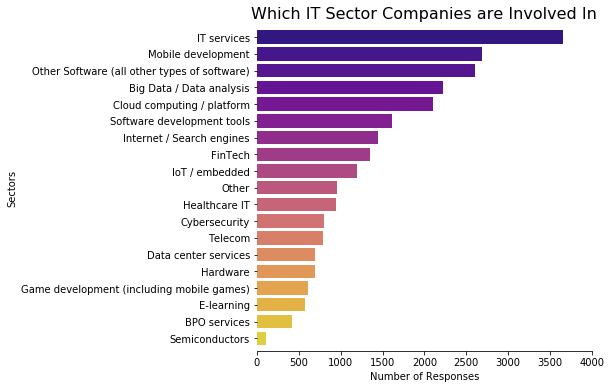

In [17]:
#find data on IT-based industries
it_sectors = all_answers[all_answers['Question'] == 'sectors_it'].sort_values(by='Total', ascending=False)
it_sectors

#plot bar graph showing different IT sectors
plt.figure(figsize=(6,6))
ax = sns.barplot(y=it_sectors['Answer'], x=it_sectors['Total'], orient='h', palette='plasma')
ax.set_title('Which IT Sector Companies are Involved In', fontsize=(16))
ax.set(xlim=(0,4000),ylim=(18.75,-.75))
ax.set(xlabel='Number of Responses', ylabel='Sectors')
sns.despine(left=True, bottom=False, right=True)

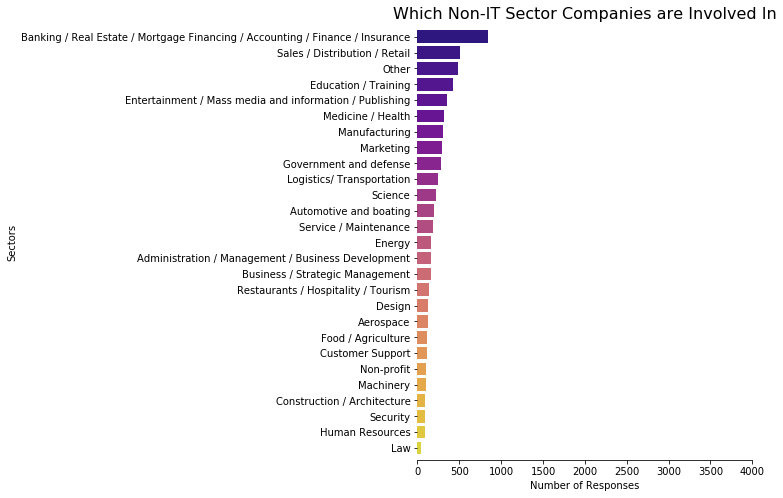

In [18]:
#find data on non-IT industries
non_it_sectors = all_answers[all_answers['Question'] == 'sectors_nonit'].sort_values(by='Total', ascending=False)

#plot bar graph showing different IT sectors
plt.figure(figsize=(6,8))
ax = sns.barplot(y=non_it_sectors['Answer'], x=non_it_sectors['Total'], orient='h', palette='plasma')
ax.set_title('Which Non-IT Sector Companies are Involved In', fontsize=(16))
ax.set(xlim=(0,4000),ylim=(26.75,-.75))
ax.set(xlabel='Number of Responses', ylabel='Sectors')
sns.despine(left=True, bottom=False, right=True)

Conclusion:

A majority of companies that respondent's work for are involved in information technology.  Banking and Finance ranks highest in Non-IT sectors, and is actually more common than Cybersecurity and below in the IT sectors.  

### Employer Profile: Company Size (JB)

Company Size was automatically grouped by the answers given by the respondents.  The results are graphed below.

[Text(0, 0.5, 'Size Group'), Text(0.5, 0, 'Number of Responses')]

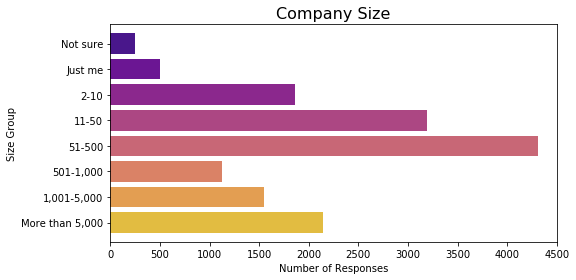

In [19]:
#find data on company size
company_size = all_answers[all_answers['Question'] == 'company_size'].sort_values(by='Total', ascending=False)

#reorder the series
correct_order = [7, 6, 3, 1, 0, 5, 4, 2]
company_size = company_size.reset_index()
company_size = company_size.reindex(index=correct_order)

#plot bar graph showing different IT sectors
plt.figure(figsize=(8,4))
ax = sns.barplot(y=company_size['Answer'], x=company_size['Total'], orient='h', palette='plasma')
ax.set_title('Company Size', fontsize=(16))
ax.set(xlim=(0,4500),ylim=(7.75,-.75))
ax.set(xlabel='Number of Responses', ylabel='Size Group')

Conclusion:

A majority of respondents work for companies with 500 or less employees.  This could be due to the start-up culture around tech, and how quickly technology changes.  There is evidence of an abundance of larger companies, which is good news for the tech industry.

### Employer Profile: Team Size (JB)

Team Size was also automatically grouped by the answers given by the respondents.

[Text(0, 0.5, 'Size Group'), Text(0.5, 0, 'Number of Responses')]

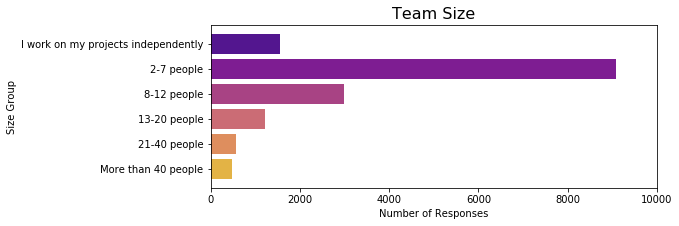

In [20]:
#find data on company size
team_size = jb['team_size'].value_counts()

#reorder the series
correct_order = [2, 0, 1, 3, 4, 5]
team_size = team_size.reset_index()
team_size = team_size.reindex(index=correct_order)

#plot bar graph showing different IT sectors
plt.figure(figsize=(8,3))
ax = sns.barplot(y=team_size['index'], x=team_size['team_size'], orient='h', palette='plasma')
ax.set_title('Team Size', fontsize=(16))
ax.set(xlim=(0,10000),ylim=(5.75,-.75))
ax.set(xlabel='Number of Responses', ylabel='Size Group')


Conclusion:

2-7 people seems to be the magic range of people to have on a team.  Projects that require more than 40 people are the minority in this case.

### Employer Profile: Remote / Part-time / Full-time (JB)

I referenced employment status in Jet Brains and graphed a bar chart below.

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Number of Responses')]

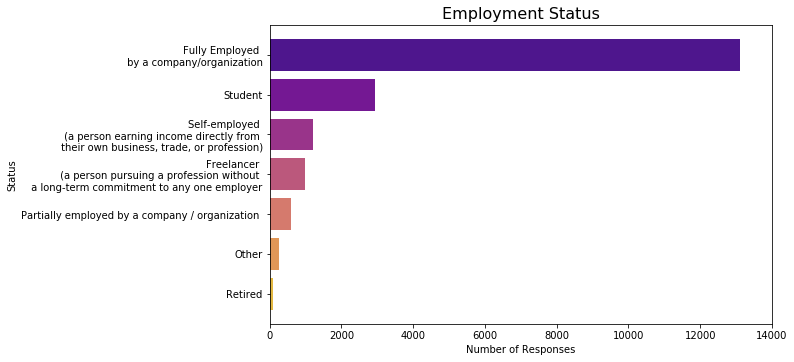

In [21]:
#find data on employment status
employment_status = jb['employment_status'].value_counts()

#rearrange the labels
yticklabels = ['Fully Employed \n by a company/organization', 
                'Student', 
                'Self-employed \n (a person earning income directly from \n their own business, trade, or profession)',
                'Freelancer \n (a person pursuing a profession without \n a long-term commitment to any one employer', 
                'Partially employed by a company / organization ',
                'Other', 'Retired']

#plot bar graph showing different IT sectors
plt.figure(figsize=(9,5.5))
ax = sns.barplot(y=employment_status.index, x=employment_status.values, orient='h', palette='plasma')
ax.set_title('Employment Status', fontsize=(16))
ax.set_yticklabels(yticklabels)
ax.set(xlim=(0,14000),ylim=(6.75,-.75))
ax.set(xlabel='Number of Responses', ylabel='Status')

Conclusion:

Full-time work seems to be the most common among respondents.  Many respondents are also still students, which alludes to a growing industry.

### Employer Profile: Overtime (SO)

In addition to showing overtime (40+ hours), I created a breakdown of how many hours are worked each week for the data market.  I used Stack Overflow data to answer this question.  I grouped the hours in bins of 5.

[Text(0, 0, 'Less than 30'),
 Text(0, 0, '30 to 34'),
 Text(0, 0, '35 to 39'),
 Text(0, 0, '40 to 44'),
 Text(0, 0, '45 to 49'),
 Text(0, 0, '50 to 54'),
 Text(0, 0, '55 to 59'),
 Text(0, 0, '60 to 64'),
 Text(0, 0, '65 to 69'),
 Text(0, 0, '70 or More')]

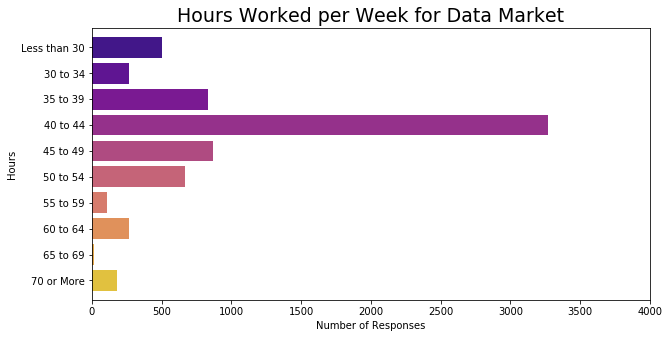

In [22]:
#drop missing values in 'WorkWeekHrs'
work_week_hrs = so_data_filter['WorkWeekHrs'].dropna()

#cut values into bin groups
work_week_hrs = pd.cut(x=work_week_hrs.values, bins=[0,29,34,39,44,49,54,59,64,69,999])
work_week_hrs_grouped = work_week_hrs.value_counts()

#plot hours worked per week for data market
plt.figure(figsize=(10,5))
ax = sns.barplot(y=work_week_hrs_grouped.index, x=work_week_hrs_grouped.values, orient='h', palette='plasma')
ax.set_title('Hours Worked per Week for Data Market', size=(19))
ax.set(xlabel='Number of Responses', ylabel='Hours')
ax.set(xlim=(0,4000),ylim=(9.75,-.75))
ax.set_yticklabels(['Less than 30', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 or More'])

Conclusion:

Working 40-44 hours per week is the most common for respondents in the data market.  However, there is no shortage of respondents who consistently work overtime hours.  

### Employer Profile Conclusions and Recommendations:

Most companies are involved in the IT sector in someway.  If you're looking to apply outside of IT, finance and banking will have many opportunities.  Most employees work full-time, 40-44 hours a week, on teams averaging 2-7 people.  There is a somewhat even distribution of company size, so there is a wide variety of options when choosing an employer.      

# Demographics and Social Diversity 

This section will help create a cultural and societal picture of the data market.  It will show how age group size differs, gender and racial diversification, and a breakdown of highest level of education.

### Demographics and Social Diversity: Age (SO)

To show the age breakdown, I grouped the years in bins of 5.  This data reflects the data market as a whole.

[Text(0, 0, 'Younger than 15'),
 Text(0, 0, '15 to 19'),
 Text(0, 0, '20 to 24'),
 Text(0, 0, '25 to 29'),
 Text(0, 0, '30 to 34'),
 Text(0, 0, '35 to 39'),
 Text(0, 0, '40 to 44'),
 Text(0, 0, '45 to 49'),
 Text(0, 0, '50 to 54'),
 Text(0, 0, '55 to 59'),
 Text(0, 0, '60 to 64'),
 Text(0, 0, '65 to 69'),
 Text(0, 0, '70 or More')]

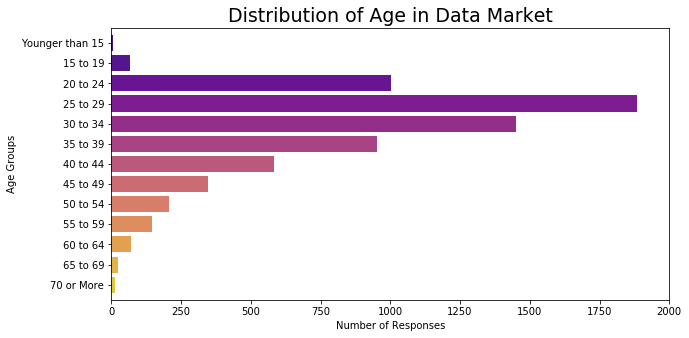

In [23]:
#drop missing values for ages
ages = so_data_filter['Age'].dropna()

#cut values into bin groups
ages = pd.cut(x=ages.values, bins=[0,14,19,24,29,34,39,44,49,54,59,64,69,999])
ages_grouped = ages.value_counts()

#plot hours worked per week for data market
plt.figure(figsize=(10,5))
ax = sns.barplot(y=ages_grouped.index, x=ages_grouped.values, orient='h', palette='plasma')
ax.set_title('Distribution of Age in Data Market', size=(19))
ax.set(xlabel='Number of Responses', ylabel='Age Groups')
ax.set(xlim=(0,2000),ylim=(12.75,-.75))
ax.set_yticklabels(['Younger than 15', '15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 or More'])

Conclusion:

The most common age in the data market is respondents who are between 25 and 29 years old.  There are also relatively the same amount of respondents who are 15 to 19 as there are 65 to 69 years old.  

### Demographics and Social Diversity: Gender (SO)

For gender I decided to display each answer in depth.  Respondent's answers overlapped, so I used a venn diagram to show what percentage of respondents identify with multiple or zero genders.

In [24]:
#study different options for gender inputs
gender = so_data_filter['Gender'].dropna().value_counts()
gender.sum()

7538

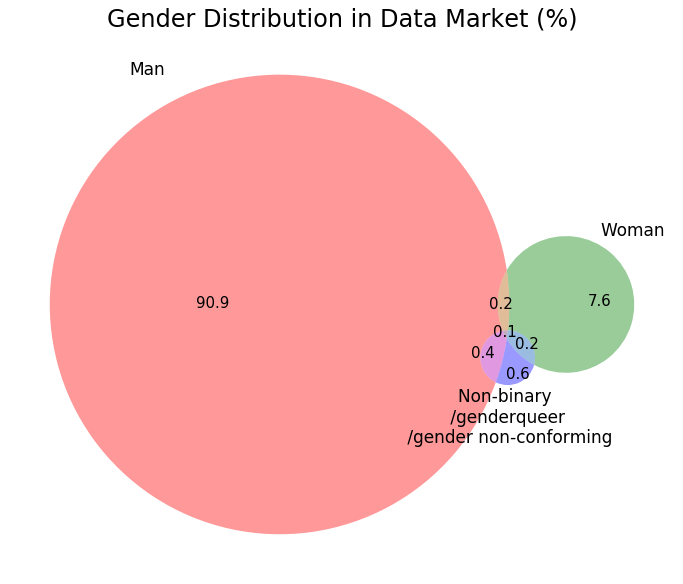

In [25]:
#!pip install matplotlib-venn
from matplotlib_venn import venn3

#find percentage of each answer
xlabels = ['Man', 'Woman', 'Non-binary \n /genderqueer \n /gender non-conforming']
ylabels = [6850, 574, 14, 47, 28, 17, 8]
result=[]
for item in ylabels:
    percent = item/7538 * 100
    result.append(np.round(percent,1))

#plot venn diagram with each gender
plt.figure(figsize=(12,12))
gender_venn=venn3(subsets=(result), set_labels=xlabels)
for text in gender_venn.set_labels:
    text.set_fontsize(17)
for text in gender_venn.subset_labels:
    text.set_fontsize(15)
plt.title('Gender Distribution in Data Market (%)', fontsize=(24))
plt.show()

Conclusion:

Respondents who identify as 'Men' dominate the data market.  It seems gender diversity in data has quite a long way to go.  

### Demographics and Social Diversity: Race and Ethnicity (SO)

This is breakdown of race and ethnicity in the data market as a whole.

In [26]:
#find each unique string in 'race' and it's value count
so_race = so_data_filter.iloc[:,16].str.split(';').apply(pd.Series).stack().reset_index(drop=True).value_counts()

[Text(0, 0.5, 'Race'), Text(0.5, 0, 'Number of Responses')]

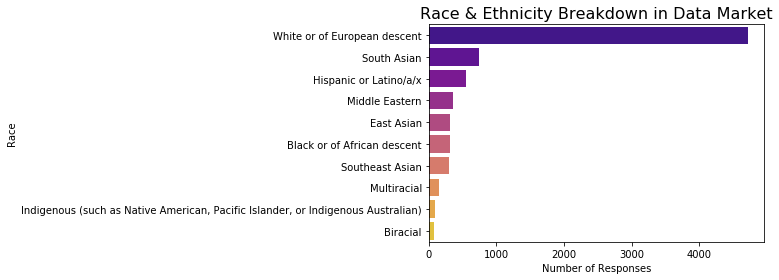

In [27]:
#plot bar graph showing race & ethnicity of respondents in the Data Market(DA,DE,DS)
plt.figure(figsize=(6,4))
ax = sns.barplot(y=so_race.index, x=so_race.values, orient='h', palette='plasma')
ax.set_title('Race & Ethnicity Breakdown in Data Market', size=(16))
ax.set(xlabel='Number of Responses', ylabel='Race')

Conclusion:

Racial diversity is skewed heavily toward white respondents.  There is still more work to be done to increase minority representation in the data market.

### Demographics and Social Diversity: Education (SO)

For Education, I found data on the highest level of education achieved, and broke it down by each position in the data market.

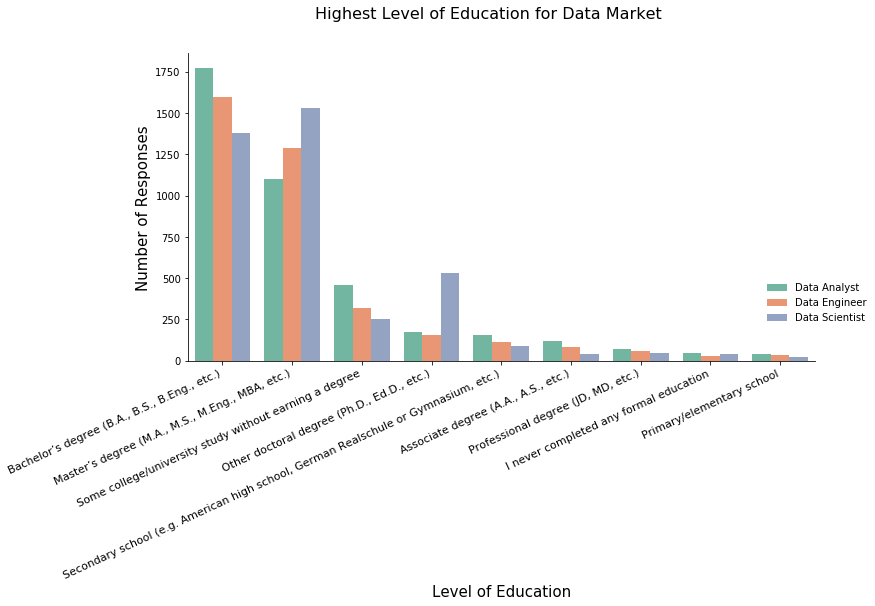

In [28]:
#find highest education for each position
DA_ed_level = so_DataAnalyst['EdLevel'].value_counts()
DE_ed_level = so_DataEngineer['EdLevel'].value_counts()
DS_ed_level = so_DataScientist['EdLevel'].value_counts()

#create dataframes
DA_ed_level_df = pd.DataFrame(index=(DA_ed_level.index), columns=['Amount'])
DA_ed_level_df['Amount'] = DA_ed_level.values 
DE_ed_level_df = pd.DataFrame(index=(DE_ed_level.index), columns=['Amount'])
DE_ed_level_df['Amount'] = DE_ed_level.values
DS_ed_level_df = pd.DataFrame(index=(DS_ed_level.index), columns=['Amount'])
DS_ed_level_df['Amount'] = DS_ed_level.values

#merge the dataframes
ed_level_merged = DA_ed_level_df.join(DE_ed_level_df, lsuffix='_left', rsuffix='_right').join(DS_ed_level_df)
ed_level_merged = ed_level_merged.reset_index()
ed_level_merged = ed_level_merged.rename(columns={'index':'Degree', 'Amount_left':'DA', 'Amount_right':'DE', 'Amount':'DS'})

#melt salary_merged in order to access different hues for plotting grouped factor plot
ed_level_merged = pd.melt(ed_level_merged, id_vars='Degree', var_name="Position", value_name="Amount")

#plot salaries of data market compared between global and US
ax = sns.factorplot(x='Degree', y='Amount', hue='Position', data=ed_level_merged, kind='bar', palette=('Set2'), size=5, aspect=2)
ax.fig.suptitle('Highest Level of Education for Data Market', fontsize='16', position=('0.5', '1.1'))
ax.set_xlabels('Level of Education', fontsize=15)
ax.set_xticklabels(fontsize=11, rotation=25, horizontalalignment='right')
ax.set_ylabels('Number of Responses', fontsize=15)
ax._legend.set_title('')
leg_labels = ['Data Analyst', 'Data Engineer', 'Data Scientist']
for t, l in zip(ax._legend.texts, leg_labels): 
    t.set_text(l)

Conclusion:

Having a Bachelor's or Master's degree seems to be the most common level of education for respondents in the data market.  A large number of data scientists also have their Ph.D..  Whether 'Some college/university' responses mean dropout, or still in school, this share of respondents outweighs the group of respondents with Associate degrees.

### Conclusions and Recommendations for Demographics and Social Diversity:

A large majority of workers in the data market are under 35 years old, which points to a growing field where job positions are needing to be filled.  There is room for improvement with diversification in gender as well as ethnicities.  The data market distribution in this case is weighted heavily on the side of white men.  Education is also important in the data market, with a large percent of workers who have attained bachelor's and master's degrees.  

# General Conclusion:

By examining the overall data more in-depth, I was able to distinguish differences between different roles in the data market specifically.  These differences will be valuable to anyone who knows they want to be involved in data, but want a better breakdown of how each role is unique.  When referring to companies, I used data from all respondents, data and non-data related, and found insights that can also be valuable for anyone breaking into the field of tech.